# Transformation de Box-Cox sur des variables numériques

La transformation de Box-Cox appartient à la famille des fonctions de puissance et est définie par $\frac{X^{ λ}-1}{ λ}$ 

si X > 0 ou log(X) si X = 0, où X est la variable et λ est le paramètre de transformation. Dans la transformation de Box-Cox, plusieurs valeurs sont considérées et celui qui renvoie la meilleure transformation est sélectionné. Dans cette recette, nous allons effectuer une transformation Box-Cox en utilisant SciPy, scikit-learn et Feature-engine

La transformation de Box-Cox ne peut être utilisée que sur des variables positives. Si vos variables ont des valeurs négatives, essayez la transformation Yeo-Johnson, qui est décrite dans la recette suivante, Exécution de la transformation Yeo-Johnson sur les variables numérique


In [3]:
!pip install feature_engine

     |████████████████████████████████| 179 kB 7.3 MB/s 
     |████████████████████████████████| 9.5 MB 78.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:

import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# with open-source packages
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import BoxCoxTransformer

In [6]:
# load the the Boston House price data from scikit-learn

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# display top 5 rows (not in book)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


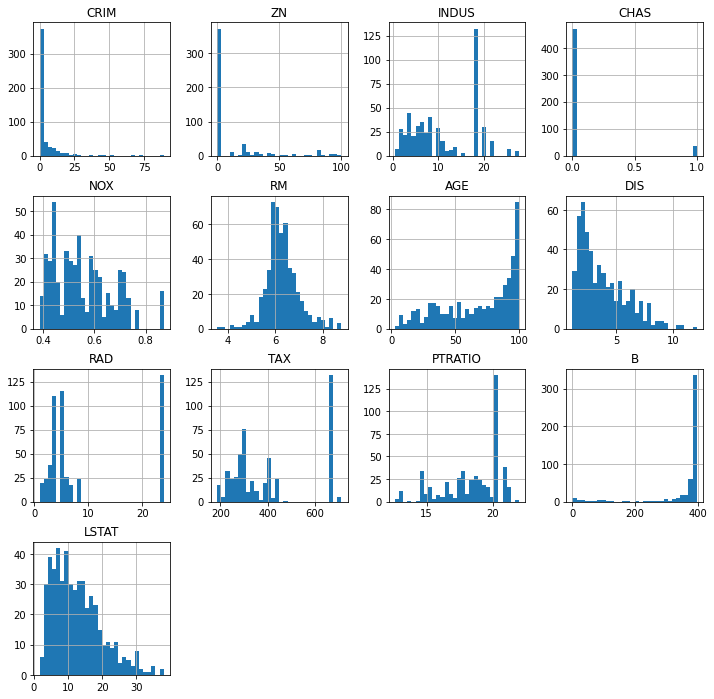

In [7]:
# plot the histogram to inspect variable distributions (not in book)

data.hist(bins=30, figsize=(12,12))
plt.show()

In [8]:

# plot histogram and Q-Q plots to have a look at the variable distribution
# (not included in this recipe, but present in recipe 1)

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

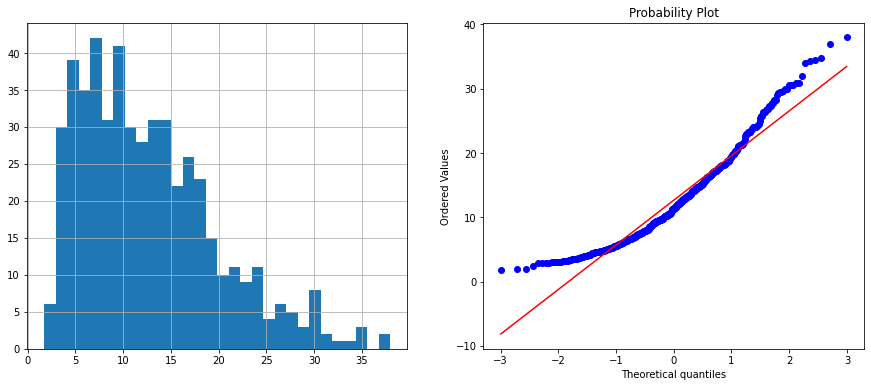

In [9]:
# check original distribution (not in book chapter)

diagnostic_plots(data, 'LSTAT')

## Box-Cox transformation with SciPy

In [10]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

scipy.stats.boxcox() ne peut être appliqué qu'à des données unidimensionnelles et renvoie deux paramètres : la variable transformée et le lambda optimal pour la transformation, que nous capturons dans la variable param

Optimal λ:  0.22776736893884023


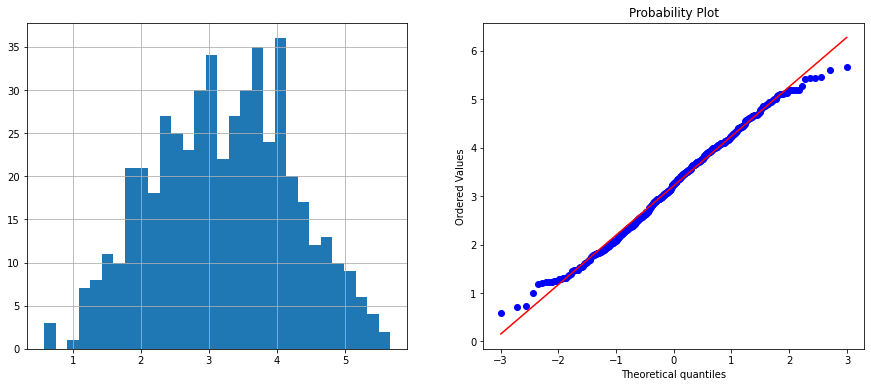

In [11]:

# apply the Box-Cox transformation to variable LSTAT
data_tf['LSTAT'], param = stats.boxcox(data['LSTAT']) 

# print the optimal lambda found for LSTAT
print('Optimal λ: ', param)

# visualize the transformed variable (not in book chapter)
diagnostic_plots(data_tf, 'LSTAT')

## Box-Cox transformation with Scikit-learn

In [12]:
# initialize the transformer with box-cox
transformer = PowerTransformer(method='box-cox', standardize=False)

In [13]:
# make list with columns to transform
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

In [14]:
# fit transformer to slice of dataframe with indicated variables
# transformer will learn the lambdas
transformer.fit(data[cols])

PowerTransformer(copy=True, method='box-cox', standardize=False)

N'oubliez pas que les paramètres doivent être appris à partir de train et utilisés pour transformer le train et l'ensemble de test. Pour cette raison, vous devez diviser vos données en ensembles d'apprentissage et de test.

In [15]:
# lambdas are stored in a transformer attribute (not in book)
transformer.lambdas_

array([ 0.22776737, -0.91561209, -0.15560583,  0.44895979])

In [16]:
# transform slice of dataframe with indicated variables
# returns NumPy array
data_tf = transformer.transform(data[cols])

In [17]:
# transform NumPy array to pandas dataframe
data_tf = pd.DataFrame(data_tf, columns=cols)

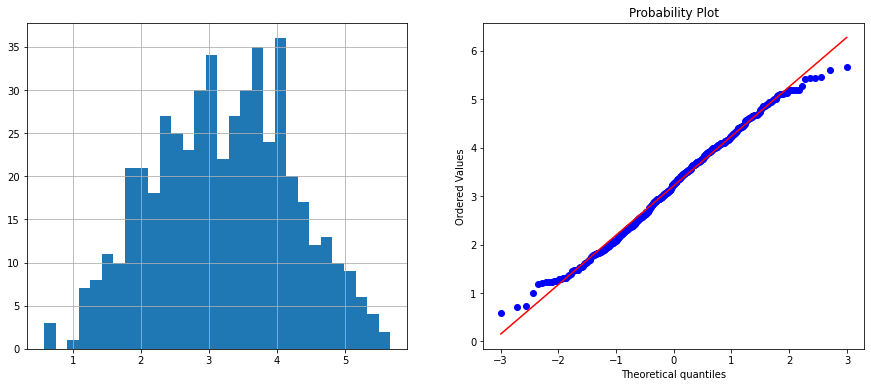

In [18]:
# visualize transformation (not in book)
diagnostic_plots(data_tf, 'LSTAT')

## Box-Cox transformation with Feature-engine

In [19]:
# initialize the transformer with a group of variables to transform
bct = BoxCoxTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'])

# fit transformer to the data set
bct.fit(data)

BoxCoxTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [20]:
# transform the indicated variables in our dataframe
# returns a new dataframe

data_tf = bct.transform(data)

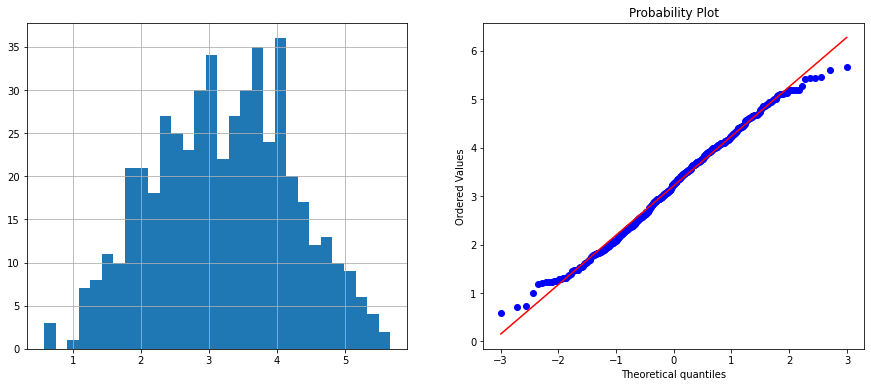

In [21]:
# visualize the distribution (not in book)
diagnostic_plots(data_tf, 'LSTAT')

In [22]:

# the transformer stores the optimal parameter for each 
# variable in a dictionary in its attribute lambda_dict_

bct.lambda_dict_

{'DIS': -0.15560583167193484,
 'LSTAT': 0.22776736893884023,
 'NOX': -0.9156120907279849,
 'RM': 0.4489597919730037}